# Short analysis of the molecule data

Sébastien MEYER

In [3]:
import pickle

import numpy as np

import networkx as nx

import matplotlib.pyplot as plt
import seaborn as sns

# Distribution plots

In [4]:
graph_list_train = pickle.load(open("data/training_data.pkl", "rb"))
graph_list_test = pickle.load(open("data/test_data.pkl", "rb"))
    
graph_lists = [graph_list_train, graph_list_test]
graph_names = ["train", "test"]    

for graph_list, graph_name in zip(graph_lists, graph_names):

    print(f"There are {len(graph_list)} graphs in the {graph_name} set.")

There are 6000 graphs in the train set.
There are 2000 graphs in the test set.


Minimal number of nodes is 2 in train set
Maximal number of nodes is 103 in train set


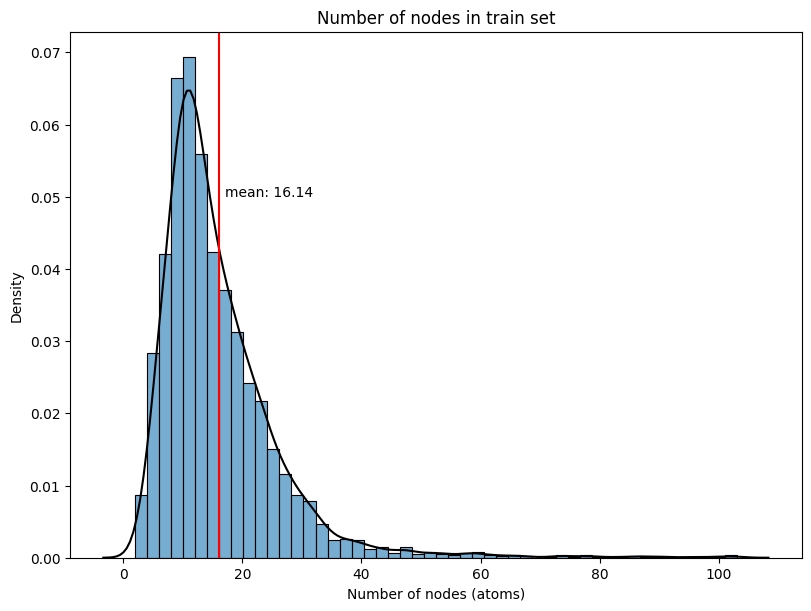

Minimal number of nodes is 2 in test set
Maximal number of nodes is 132 in test set


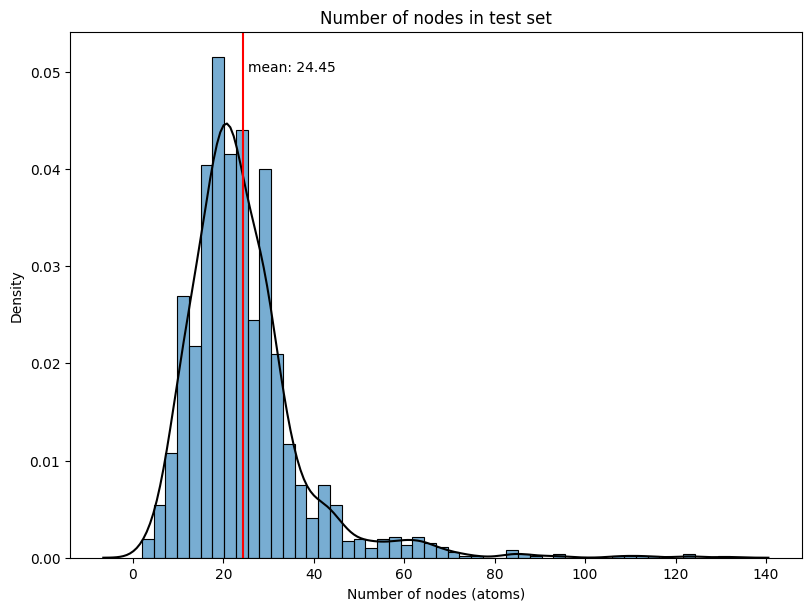

In [5]:
for graph_list, graph_name in zip(graph_lists, graph_names):

    nb_nodes_list = [graph.number_of_nodes() for graph in graph_list]

    mean_nb_nodes = np.mean(nb_nodes_list)
    min_nb_nodes = np.min(nb_nodes_list)
    max_nb_nodes = np.max(nb_nodes_list)

    fig, ax = plt.subplots(figsize=(8, 6), constrained_layout=True)

    sns.histplot(nb_nodes_list, stat="density", bins=50, fill=True, alpha=0.6, ax=ax)

    sns.kdeplot(nb_nodes_list, color="black", ax=ax)

    ax.axvline(mean_nb_nodes, color="red")
    ax.text(mean_nb_nodes+1, 0.05, f"mean: {mean_nb_nodes:.2f}")

    ax.set_xlabel("Number of nodes (atoms)")
    ax.set_title(f"Number of nodes in {graph_name} set")

    print(f"Minimal number of nodes is {min_nb_nodes} in {graph_name} set")
    print(f"Maximal number of nodes is {max_nb_nodes} in {graph_name} set")    
    
    plt.show()

In [6]:
for graph_list, graph_name in zip(graph_lists, graph_names):

    atoms_list = [graph.nodes[i]["labels"][0] for graph in graph_list for i in range(graph.number_of_nodes())]

    unique_atoms, atoms_counts = np.unique(atoms_list, return_counts=True)
    nb_unique_atoms = len(unique_atoms)
    min_atom = np.min(unique_atoms)
    max_atom = np.max(unique_atoms)

    atoms_dist = {atom: atom_count for atom, atom_count in zip(unique_atoms, atoms_counts)}
    atoms_dist = {k: v for k, v in sorted(atoms_dist.items(), key=lambda item: item[1], reverse=True)}

    print(f"There are {nb_unique_atoms} unique atoms in {graph_name} set ranging from {min_atom} to {max_atom}")
    print(f"Their distribution for {graph_name} set is {atoms_dist}")

There are 47 unique atoms in train set ranging from 0 to 49
Their distribution for train set is {1: 68731, 0: 15755, 2: 6900, 4: 1893, 5: 1316, 3: 1014, 8: 293, 6: 277, 13: 239, 9: 106, 7: 98, 28: 38, 12: 36, 11: 25, 17: 20, 21: 11, 32: 9, 16: 8, 15: 7, 33: 7, 19: 6, 31: 5, 27: 4, 37: 4, 39: 4, 22: 3, 24: 3, 26: 3, 34: 3, 41: 3, 44: 3, 23: 2, 45: 2, 14: 1, 18: 1, 25: 1, 30: 1, 35: 1, 36: 1, 38: 1, 40: 1, 42: 1, 43: 1, 46: 1, 47: 1, 48: 1, 49: 1}
There are 31 unique atoms in test set ranging from 0 to 30
Their distribution for test set is {1: 36457, 0: 6551, 2: 3175, 4: 1089, 3: 563, 5: 554, 6: 177, 8: 114, 9: 95, 13: 51, 7: 12, 12: 7, 10: 6, 17: 6, 21: 5, 27: 4, 11: 3, 16: 3, 14: 2, 15: 2, 18: 2, 19: 2, 22: 2, 23: 2, 24: 2, 20: 1, 25: 1, 26: 1, 28: 1, 29: 1, 30: 1}


Minimal number of edges is 0 in train set
Maximal number of edges is 110 in train set


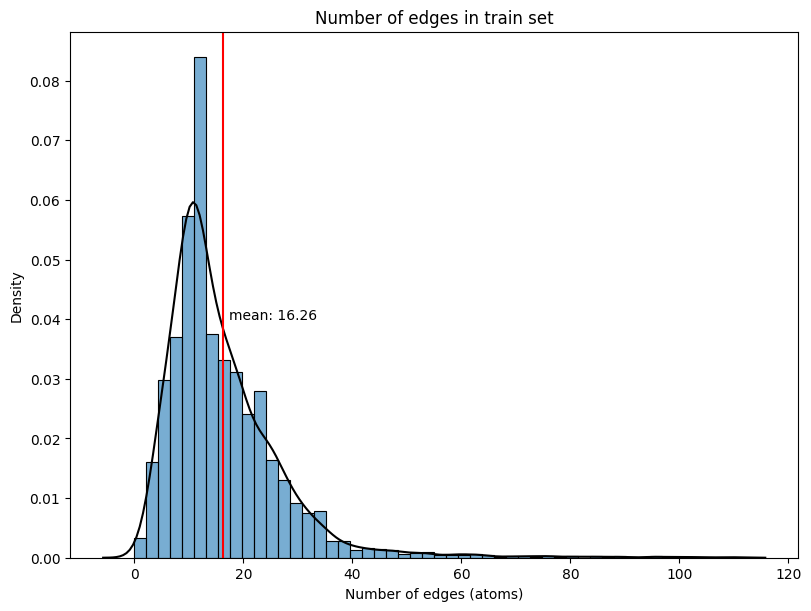

Minimal number of edges is 0 in test set
Maximal number of edges is 145 in test set


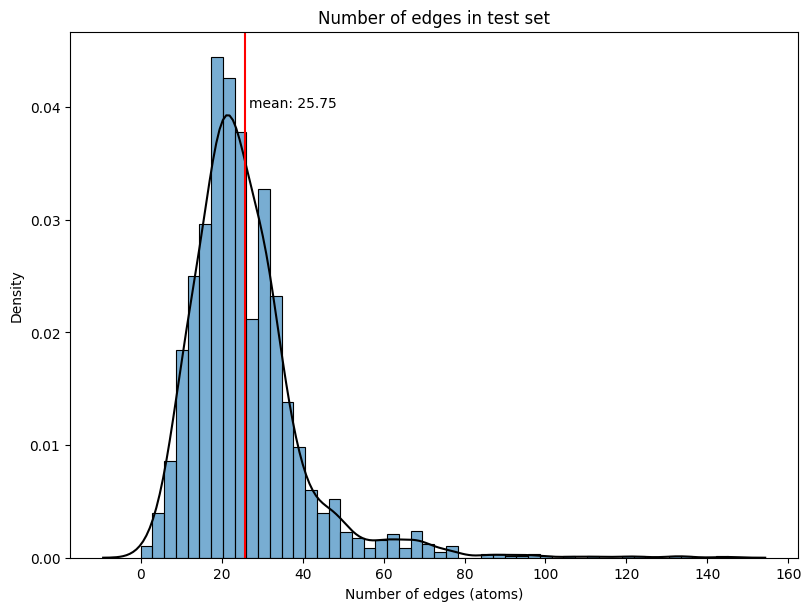

In [7]:
for graph_list, graph_name in zip(graph_lists, graph_names):

    nb_edges_list = [graph.number_of_edges() for graph in graph_list]

    mean_nb_edges = np.mean(nb_edges_list)
    min_nb_edges = np.min(nb_edges_list)
    max_nb_edges = np.max(nb_edges_list)
    
    fig, ax = plt.subplots(figsize=(8, 6), constrained_layout=True)

    sns.histplot(nb_edges_list, stat="density", bins=50, fill=True, alpha=0.6, ax=ax)

    sns.kdeplot(nb_edges_list, color="black", ax=ax)

    ax.axvline(mean_nb_edges, color="red")
    ax.text(mean_nb_edges+1, 0.04, f"mean: {mean_nb_edges:.2f}")

    ax.set_xlabel("Number of edges (atoms)")
    ax.set_title(f"Number of edges in {graph_name} set")

    print(f"Minimal number of edges is {min_nb_edges} in {graph_name} set")
    print(f"Maximal number of edges is {max_nb_edges} in {graph_name} set")   
    
    plt.show()

In [8]:
edges_list = [graph_list[42].edges[e]["labels"][0] for e in graph_list[42].edges()]

In [9]:
for graph_list, graph_name in zip(graph_lists, graph_names):

    edges_list = np.array([graph.number_of_edges() for graph in graph_list])

    nb_graph_with_no_edge = np.sum(edges_list <= 0)
    
    print(f"There are {nb_graph_with_no_edge} molecules without edges in {graph_name} set")

There are 7 molecules without edges in train set
There are 3 molecules without edges in test set


In [10]:
for graph_list, graph_name in zip(graph_lists, graph_names):
    
    connected_list = np.array([nx.is_connected(graph) for graph in graph_list])
    
    nb_unco_graphs = np.sum(connected_list)
    
    print(f"There are {nb_unco_graphs} unconnected graphs in {graph_name} set")

There are 5025 unconnected graphs in train set
There are 1502 unconnected graphs in test set


In [13]:
y_train = pickle.load(open("data/training_labels.pkl", "rb"))
print(np.unique(y_train, return_counts=True))

(array([0, 1], dtype=int64), array([5445,  555], dtype=int64))


---